In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (C:\Users\kdrni\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\tensorflow\python\eager\def_function.py)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

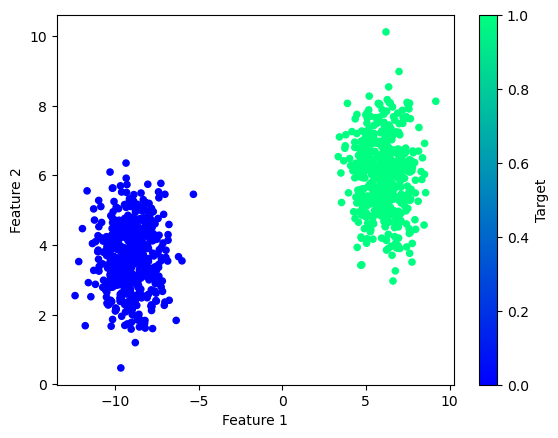

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model. First neural network model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7836 - accuracy: 0.2987
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7661 - accuracy: 0.2800
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7513 - accuracy: 0.3320
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7391 - accuracy: 0.3747
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.4160
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7201 - accuracy: 0.4453
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.4760
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.4960
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5200
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5560
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9960
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9960
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9960
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9960
Epoch 88/100
24/24 [==============================] - 0s 998us/step - loss: 0.1165 - accuracy: 0.9960
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.9960
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9960
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9960
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.996

<AxesSubplot:>

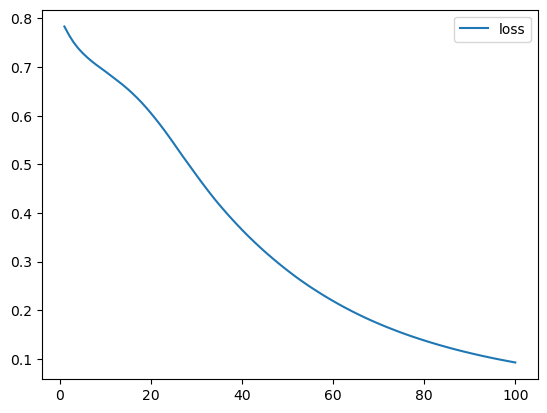

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

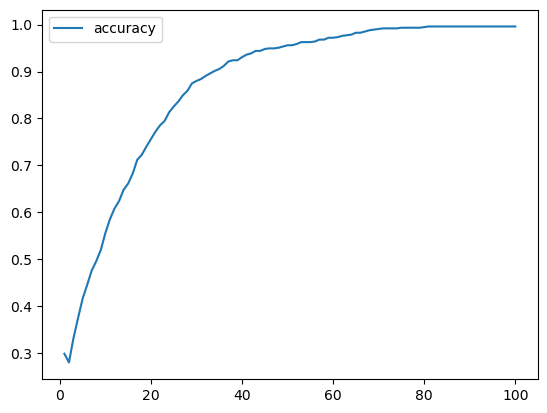

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 1.3688 - accuracy: 0.3080 - 20ms/epoch - 2ms/step
Loss: 1.3688417673110962, Accuracy: 0.30799999833106995


In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


1/1 [==============================] - 0s 14ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

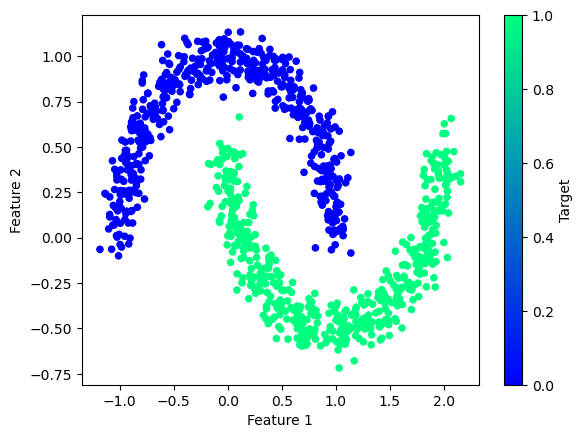

In [20]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [21]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [22]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8907
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2645 - accuracy: 0.8893
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.8893
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8893
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.8907
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8907
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8893
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.8893
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8920
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8920
Epoch 11/

<AxesSubplot:>

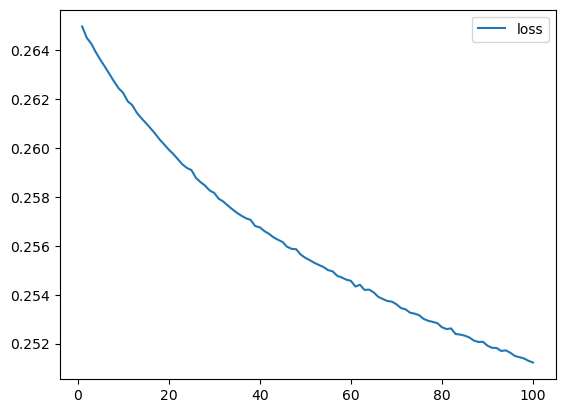

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

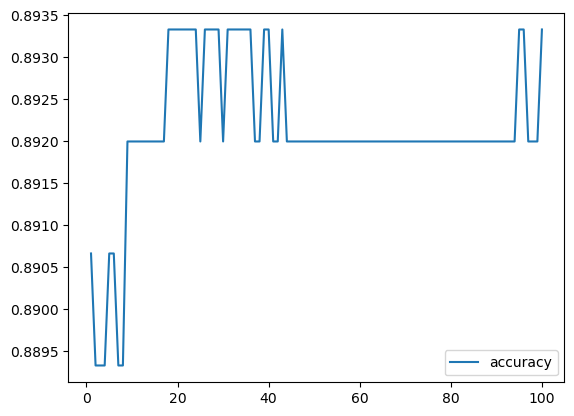

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [25]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [26]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [27]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7156 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.4547
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.4200
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.4213
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.5373
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5966 - accuracy: 0.7160
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7787
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.7907
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5461 - accuracy: 0.8147
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.8187
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1988 - accuracy: 0.9093
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9093
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1969 - accuracy: 0.9093
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9107
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9093
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9107
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9107
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.9107
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9107
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9120
Epoch 93/100
